### import and path

In [9]:
!pip list |grep Shapely


Shapely                  1.8.2


In [10]:
import socket
import sys
import pickle
import os
import time
from pprint import pprint

sys.path.append('/home/lxh/dev/DRL-urban-planning')
home_dir= '/home/lxh/dev/drl_urban_planning/'
root_dir = '/home/lxh/dev/drl_urban_planning/'

### demo

In [11]:
from urban_planning.envs import CityEnv
from urban_planning.envs import city_config
from urban_planning.utils.config import Config

In [12]:
id = 'grid'
seed = 111
temp = False
cfg = Config(id, seed, temp, root_dir)
env = CityEnv(cfg)

In [13]:
model_path = os.path.join(root_dir, id, str(seed), 'models', 'best.p')
d = pickle.load(open(model_path, 'rb'))
gdf = d['best_plans'][0]['gdf']
print(d['best_plans'][0])

{'road_network': 0.710875496031746, 'life_circle': 0.6680017342345674, 'greenness': 0.47504135222083843, 'concept': -1.0, 'road_network_info': {'connectivity_reward': 1.0, 'density_reward': 0.6223958333333334, 'dead_end_penalty': 1.0, 'short_road_penalty': 0.5, 'long_road_penalty': 0.14285714285714285, 'road_distance_penalty': 1.0}, 'land_use_reward': 3.147048289159108, 'life_circle_info': {'life_circle_15min': 0.9375, 'life_circle_10min': 0.65, 'life_circle_5min': 0.15000000000000002, 'life_circle_10min_area': 0.6604046242774566, 'decentralization_reward': 0.36003468469134753, 'utility': 0.1957465277777778, 'shopping': 0.5, 'working': 0.5, 'education': 0.8125, 'medical care': 0.8125, 'entertainment': 0.625}, 'concept_info': {}, 'gdf':      type  existence                                           geometry  rect  \
id                                                                              
0       2      False  LINESTRING (0.000 0.000, 0.000 30.000, 0.000 5...   NaN   
1       2  

### load plan and score

In [14]:
env.load_plan(gdf)
env.score_plan()

reward: 3.857923785190854
{   'road_network': 0.710875496031746,
    'life_circle': 0.6680017342345674,
    'greenness': 0.47504135222083843,
    'road_network_info': {   'connectivity_reward': 1.0,
                             'density_reward': 0.6223958333333334,
                             'dead_end_penalty': 1.0,
                             'short_road_penalty': 0.5,
                             'long_road_penalty': 0.14285714285714285,
                             'road_distance_penalty': 1.0},
    'life_circle_info': {   'life_circle_15min': 0.9375,
                            'life_circle_10min': 0.65,
                            'life_circle_5min': 0.15000000000000002,
                            'life_circle_10min_area': 0.6604046242774566,
                            'decentralization_reward': 0.36003468469134753,
                            'utility': 0.1957465277777778,
                            'shopping': 0.5,
                            'working': 0.5,
              

/home/lxh/anaconda3/envs/urban/lib/python3.8/site-packages/momepy/preprocessing.py:273: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return df.append(


(3.857923785190854,
 {'road_network': 0.710875496031746,
  'life_circle': 0.6680017342345674,
  'greenness': 0.47504135222083843,
  'road_network_info': {'connectivity_reward': 1.0,
   'density_reward': 0.6223958333333334,
   'dead_end_penalty': 1.0,
   'short_road_penalty': 0.5,
   'long_road_penalty': 0.14285714285714285,
   'road_distance_penalty': 1.0},
  'life_circle_info': {'life_circle_15min': 0.9375,
   'life_circle_10min': 0.65,
   'life_circle_5min': 0.15000000000000002,
   'life_circle_10min_area': 0.6604046242774566,
   'decentralization_reward': 0.36003468469134753,
   'utility': 0.1957465277777778,
   'shopping': 0.5,
   'working': 0.5,
   'education': 0.8125,
   'medical care': 0.8125,
   'entertainment': 0.625}})

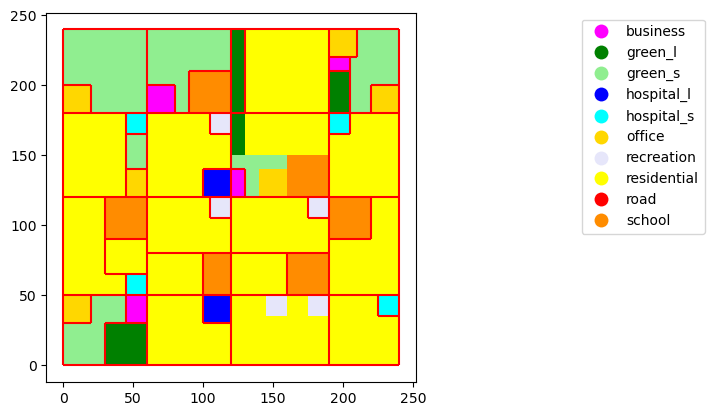

In [15]:
env.visualize()

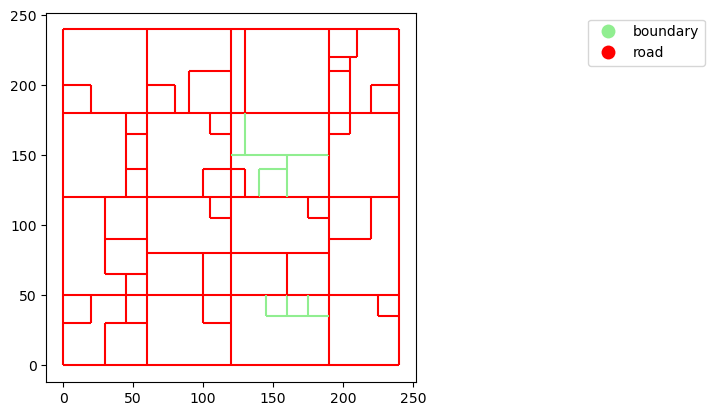

In [16]:
env.visualize_road_and_boundary()